In [1]:
import pandas as pd
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model, MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments, Policy, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint
from ema_workbench.util.utilities import (save_results, load_results)
import seaborn as sns
from SALib.analyze import sobol
import matplotlib.pyplot as plt


In [5]:
# get results from MORO
result_MORO = pd.read_csv('ANALYSIS_results/robust_results_10scenario_100nfe.csv')

In [6]:
# get policies
policies = result_MORO[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2']]
policies_list = [Policy(str(index), **row.to_dict()) for index, row in policies.iterrows()]

In [7]:
model, functions = get_model_for_problem_formulation(2)

In [4]:
# run model using sobol sampling
ema_logging.log_to_stderr(ema_logging.INFO)


with MultiprocessingEvaluator(model) as evaluator:
    experiment, result = evaluator.perform_experiments(
                                         scenarios=100,
                                         policies = policies_list, 
                                         uncertainty_sampling='sobol')

[MainProcess/INFO] pool started
D:\Anaconda\envs\EPA_1361\lib\site-packages\SALib\sample\saltelli.py:52: FutureWarning: 
        Convergence properties of the Sobol' sequence is only valid if `N` = 2^n.
        SALib will continue on, but results may have issues.
        In future, this will raise an error.
        
  warnings.warn(msg, FutureWarning)
[MainProcess/INFO] performing 4000 scenarios * 2 policies * 1 model(s) = 8000 experiments
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 5600 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
results = experiment, result

In [8]:

save_results(results, 'ANALYSIS_results/02_sobol_results_100scenario.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Windows\OneDrive\GitHub\EPA1361\lab_sessions\final assignment\ANALYSIS_results\02_sobol_results_100scenario.tar.gz


In [3]:
experiment, result = load_results('ANALYSIS_results/02_sobol_results_100scenario.tar.gz')

In [8]:
# speficy SA lib problem
SA_lib_problem = get_SALib_problem(model.uncertainties)

In [9]:
experiment['Minimum water level full network'] = result['Minimum water level full network'] 

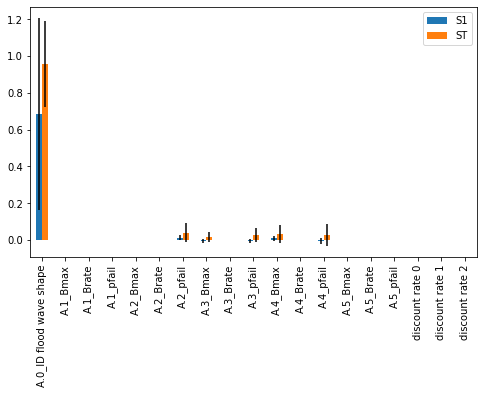

In [25]:
# SOBOL results for first policy
Si = sobol.analyze(SA_lib_problem, experiment[experiment['policy'] == 0]['Minimum water level full network'].to_numpy())
scores_filtered = {k:Si[k] for k in ['ST', 'ST_conf', 'S1', 'S1_conf']}
Si_df_1 = pd.DataFrame(scores_filtered, index= SA_lib_problem['names'])
fig, ax = plt.subplots(1)
indices = Si_df_1[['S1', 'ST']]
err = Si_df_1[['S1_conf', 'ST_conf']]
indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)

In [26]:
Si_df_1

,ST,ST_conf,S1,S1_conf
A.0_ID flood wave shape,9.554058e-01,2.331827e-01,6.849492e-01,5.212356e-01
A.1_Bmax,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A.1_Brate,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A.1_pfail,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A.2_Bmax,1.262383e-04,1.715240e-04,-7.258921e-04,9.849182e-04
A.2_Brate,1.230681e-15,2.022283e-15,1.631683e-09,2.681217e-09
A.2_pfail,3.929200e-02,5.238958e-02,1.120585e-02,1.416957e-02
A.3_Bmax,1.652340e-02,2.586098e-02,-5.978781e-03,9.357464e-03
A.3_Brate,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A.3_pfail,2.489312e-02,3.896053e-02,-7.338419e-03,1.148545e-02


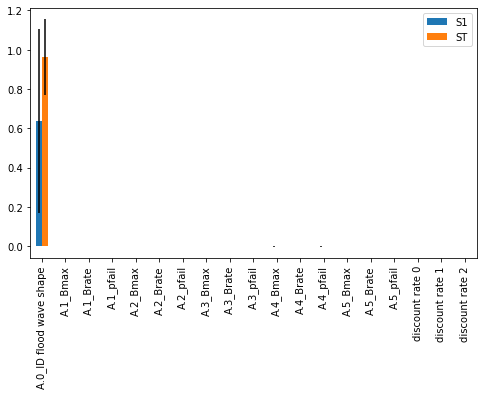

In [27]:
# SOBOL results for first policy
Si = sobol.analyze(SA_lib_problem, experiment[experiment['policy'] == 1]['Minimum water level full network'].to_numpy())
scores_filtered = {k:Si[k] for k in ['ST', 'ST_conf', 'S1', 'S1_conf']}
Si_df_2 = pd.DataFrame(scores_filtered, index= SA_lib_problem['names'])
fig, ax = plt.subplots(1)
indices = Si_df_2[['S1', 'ST']]
err = Si_df_2[['S1_conf', 'ST_conf']]
indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)

In [28]:
Si_df_2

,ST,ST_conf,S1,S1_conf
A.0_ID flood wave shape,0.963535,0.192074,0.637268,0.470390
A.1_Bmax,0.000000,0.000000,0.000000,0.000000
A.1_Brate,0.000000,0.000000,0.000000,0.000000
A.1_pfail,0.000000,0.000000,0.000000,0.000000
A.2_Bmax,0.000000,0.000000,0.000000,0.000000
A.2_Brate,0.000000,0.000000,0.000000,0.000000
A.2_pfail,0.000000,0.000000,0.000000,0.000000
A.3_Bmax,0.000000,0.000000,0.000000,0.000000
A.3_Brate,0.000000,0.000000,0.000000,0.000000
A.3_pfail,0.000000,0.000000,0.000000,0.000000
